In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox


In [2]:
df = pd.read_csv("combined_results.csv")

metric = "RMSE"
df = df[df["metric"] == metric]
#df = df[df['suite_id'] == 336]

splits = [s for s in df["split_method"].unique() if s.lower() != "random_split"]
 
method_order = [
    'ConstantPredictor', 'LinearRegressor', 'LogisticRegressor' , 'RandomForestClassifier', 'RandomForestRegressor', 'LGBMClassifier', 'LGBMRegressor',
    'Engression', 'MLP', 'ResNet', 'FTTransformer', 'DGBT', 'DRF', 'TabPFNRegressor'
]
rename_map = {
    'RandomForestClassifier': 'Random Forest',
    'RandomForestRegressor': 'Random Forest',
    'LGBMClassifier': 'Boosted Trees',
    'LGBMRegressor': 'Boosted Trees',
    'FTTransformer': 'FT-Transformer',
    'LinearRegressor': 'Linear Regression',
    'TabPFNRegressor': 'TabPFN'
}

# 3) Extract unique suites, metrics, and extrapolation methods
suites  = df['suite_id'].unique()
metrics = df['metric'].unique()
methods = df['split_method'].unique()

Split 'umap_split': baseline RMSE per task:
 task_id
361072      2.332328
361073      2.411298
361074      0.001957
361076      0.756206
361077      0.000155
361078      0.276103
361079      0.945192
361080      0.223418
361081      0.053354
361082      0.782163
361083      0.482896
361084      0.222978
361085      0.025192
361086      0.109243
361087      0.123848
361088      0.654768
361093      0.391686
361094      0.077845
361096      0.092770
361097      6.995714
361098      0.111078
361099      0.377538
361101      0.467330
361102      0.206911
361103      0.430165
361104      0.046736
361279      0.025029
361280      2.340429
361281      3.043610
361287      0.024070
361288      1.832053
361289    387.240482
361291      3.074705
361292      0.575311
361293      1.870397
361294      0.109243
dtype: float64
Split 'umap_split': overall lowest RMSE = 0.0001545947262578



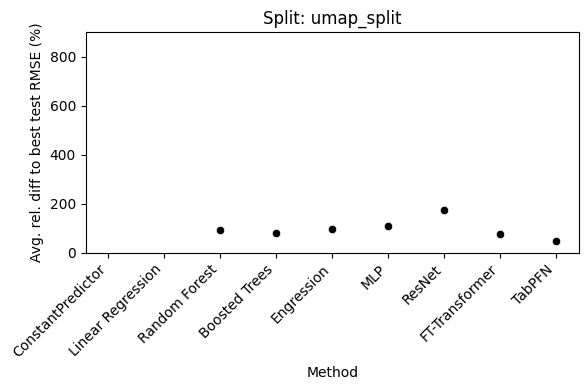

Split 'kmedoids_split': baseline RMSE per task:
 task_id
361093      0.066151
361094      2.487881
361096      0.111664
361097      8.261893
361098      0.114653
361099      0.478360
361101      0.401873
361102      0.163757
361103      0.436827
361104      0.012462
361287      0.025666
361288      2.233837
361289    404.973677
361291      2.935232
361292      0.539861
361293      1.906235
361294      0.192742
dtype: float64
Split 'kmedoids_split': overall lowest RMSE = 0.0124615997368426



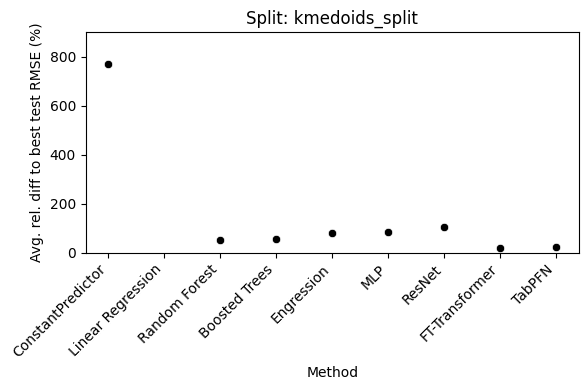

Split 'gower_split': baseline RMSE per task:
 task_id
361093      0.066522
361094      1.682160
361096      0.115570
361097      7.858750
361098      0.140371
361099      0.532168
361101      0.452992
361102      0.229836
361103      0.408299
361104      0.031202
361287      0.026459
361288      2.162013
361289    422.020573
361291      2.944008
361292      0.545782
361293      1.995108
361294      0.298026
dtype: float64
Split 'gower_split': overall lowest RMSE = 0.0264588635892774



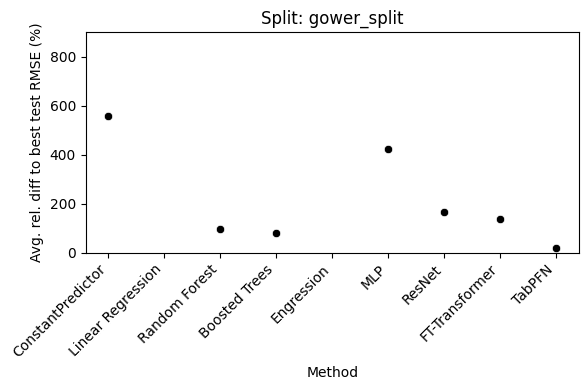

Split 'mahalanobis_split': baseline RMSE per task:
 task_id
361072    4.342733
361073    1.327924
361074    0.002376
361076    0.755014
361077    0.000216
361078    0.238430
361079    1.216632
361080    0.279980
361081    0.165416
361082    0.742261
361083    0.512406
361084    0.187371
361085    0.059187
361086    0.235366
361087    0.263375
361088    1.095788
361279    0.028242
361280    2.201527
361281    3.101494
dtype: float64
Split 'mahalanobis_split': overall lowest RMSE = 0.0002155388043123



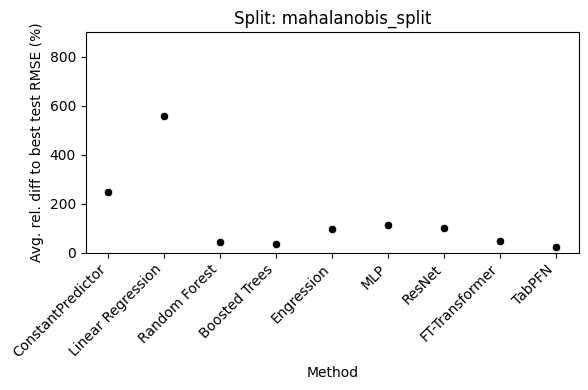

Split 'kmeans_split': baseline RMSE per task:
 task_id
361072    4.915960
361073    1.994581
361074    0.002161
361076    0.705948
361077    0.000213
361078    0.213997
361079    0.847774
361080    0.262976
361081    0.164274
361082    0.517389
361083    0.529586
361084    0.165284
361085    0.042778
361086    0.272956
361087    0.173000
361088    1.231635
361279    0.027777
361280    2.160411
361281    3.067180
dtype: float64
Split 'kmeans_split': overall lowest RMSE = 0.0002130305690047



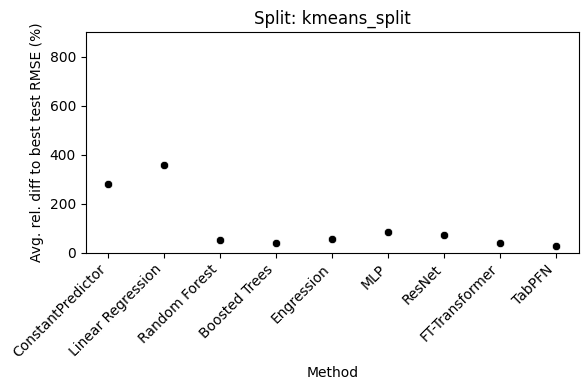

Split 'spatial_depth_split': baseline RMSE per task:
 task_id
361072    4.499054
361073    1.223352
361074    0.002493
361076    0.755450
361077    0.000212
361078    0.244689
361079    1.211294
361080    0.280927
361081    0.160078
361082    0.735151
361083    0.512270
361085    0.058268
361086    0.208819
361087    0.267862
361088    1.106089
361279    0.028219
361280    2.313366
361281    3.088980
dtype: float64
Split 'spatial_depth_split': overall lowest RMSE = 0.0002121086978598



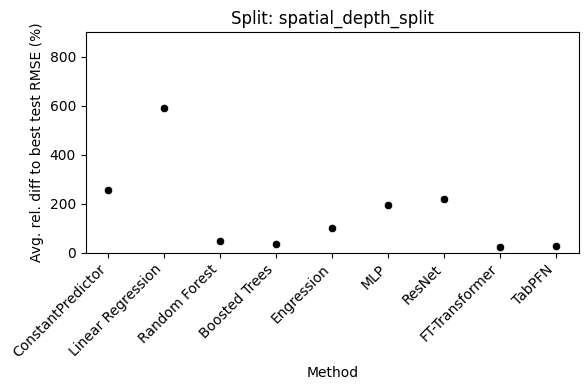

In [3]:
outdir = os.path.join('PICTURES', metric.lower())
os.makedirs(outdir, exist_ok=True)

for split in splits:
    sub = df[df["split_method"] == split]
    if sub.empty:
        continue

    table = sub.pivot(
        index="model",
        columns="task_id",
        values="value"
    )

    baseline = table.min(axis=0)
    print(f"Split '{split}': baseline RMSE per task:\n", baseline)
    print(f"Split '{split}': overall lowest RMSE = {baseline.min()}\n")

    rel = (table - baseline) / baseline

    summary = pd.DataFrame({
        "Mean": rel.mean(axis=1),
        "Median": rel.median(axis=1),
        "Std": rel.std(axis=1)
    }).reset_index().rename(columns={"model": "Method"})

    summary["Method"] = pd.Categorical(
        summary["Method"],
        categories=method_order,
        ordered=True
    )
    summary = summary.sort_values("Method")
    summary["Method"] = summary["Method"].astype(str).map(rename_map).fillna(summary["Method"].astype(str))

    summary["Mean"] = 100 * summary["Mean"]

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=summary, x="Method", y="Mean", color='black')
    plt.xlabel("Method")
    plt.ylabel("Avg. rel. diff to best test RMSE (%)")
    plt.title(f"Split: {split}")
    plt.ylim(0, 900)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    fname = f"{split}_relative_diff_{metric}.png"
    plt.savefig(os.path.join(outdir, fname), bbox_inches='tight')
    plt.show()




In [4]:
df = df[df["metric"] == "RMSE"]

df = df[df["split_method"] != "random_split"]


=== RAW relative_difference sample ===
       split_method  task_id              model        value  baseline  \
516      umap_split   361093    LinearRegressor     1.010513  0.391686   
518      umap_split   361093  ConstantPredictor     1.188115  0.391686   
520  kmedoids_split   361093    LinearRegressor     0.498135  0.066151   
522  kmedoids_split   361093  ConstantPredictor     0.674505  0.066151   
524     gower_split   361093    LinearRegressor     0.591701  0.066522   
526     gower_split   361093  ConstantPredictor     0.723444  0.066522   
536     gower_split   361093         Engression  1159.723984  0.066522   
538     gower_split   361093                MLP     0.092087  0.066522   
540     gower_split   361093             ResNet     0.124924  0.066522   
542     gower_split   361093      FTTransformer     0.066522  0.066522   
544  kmedoids_split   361093         Engression     0.324660  0.066151   
546  kmedoids_split   361093                MLP     0.299008  0.066151  

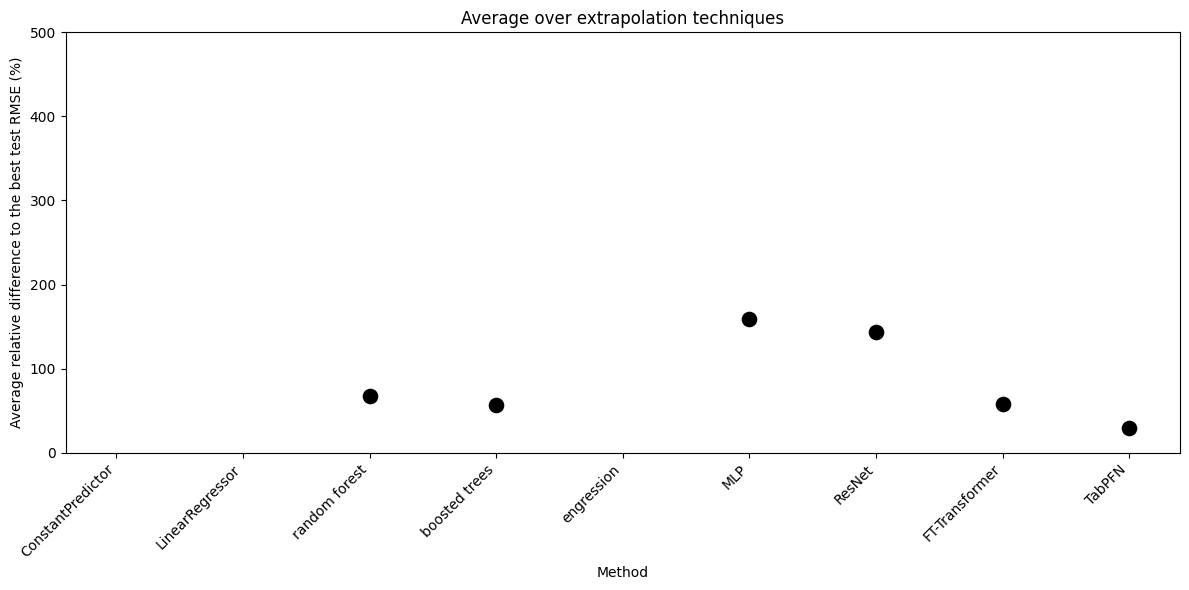

In [7]:
df["baseline"] = (
    df
    .groupby(["split_method", "task_id"])["value"]
    .transform("min")
)

df["relative_difference"] = (df["value"] - df["baseline"]) / df["baseline"]

print("\n=== RAW relative_difference sample ===")
print(df[['split_method','task_id','model','value','baseline','relative_difference']].head(20))

print("\n=== per-model relative_difference summary ===")
print(df.groupby('model')['relative_difference']
        .agg(count='count', mean='mean', min='min', max='max')
        .sort_values('mean', ascending=False)
     )

print("\n=== model appearance counts ===")
print(df.groupby('model')['relative_difference']
        .count()
        .sort_values(ascending=False)
     )


overall = (
    df
    .groupby('model')['relative_difference']
    .mean()
    .reset_index(name='Mean')
)
overall['Mean'] *= 100  

method_order = [
    'ConstantPredictor', 'LinearRegressor',
    'RandomForestClassifier', 'RandomForestRegressor',
    'LGBMClassifier', 'LGBMRegressor', 'Engression',
    'MLP', 'ResNet', 'FTTransformer', 'TabPFNRegressor'
]
overall = overall.set_index('model').reindex(method_order).reset_index()

# 3) Map to display names
rename_map = {
    'RandomForestClassifier':'random forest',
    'RandomForestRegressor':'random forest',
    'LGBMClassifier':       'boosted trees',
    'LGBMRegressor':        'boosted trees',
    'Engression':           'engression',
    'MLP':                  'MLP',
    'ResNet':               'ResNet',
    'FTTransformer':        'FT-Transformer',
    'TabPFNRegressor':      'TabPFN'
}
overall['Method'] = overall['model'].map(rename_map).fillna(overall['model'])


plt.figure(figsize=(12,6))
sns.scatterplot(data=overall, x='Method', y='Mean', color='black', s=150)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average relative difference to the best test RMSE (%)')
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')
plt.ylim(0, 500)
plt.tight_layout()

os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_RMSE_fixed.png', bbox_inches='tight')
plt.show()
